In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100, verbose=10)
#cb.fit(X, y, cat_features = cat_features, verbose = False)

In [3]:
data = pd.read_csv('../../Data/20x43_D106015.csv')

In [4]:
data.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,...,medical,moving,other,renewable_energy,small_business,vacation,Not Verified,Source Verified,Verified,loan_status_bin
0,-1.710264,-0.170493,0.829172,-0.425785,-0.425785,-0.643790,-1.712281,-0.534592,0.045671,0.052599,...,-0.185873,-0.19115,1.963633,-0.043113,-0.144338,-0.144338,1.296762,-0.758962,-0.595207,0.0
1,-0.220640,-0.022381,-0.004694,-0.713738,-0.713738,1.352522,-0.187752,0.281683,0.133276,-0.375976,...,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207,1.0
2,-1.071854,0.240519,0.629044,-0.425785,-0.425785,1.352522,-1.051675,-0.738661,-1.005580,1.311539,...,-0.185873,-0.19115,1.963633,-0.043113,-0.144338,-0.144338,-0.771151,-0.758962,1.680088,0.0
3,-0.220640,0.014648,0.680359,0.150120,0.150120,1.352522,-0.187752,1.506095,0.746505,2.320996,...,5.380004,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207,0.0
4,-0.305762,-0.194784,1.090877,-0.425785,-0.425785,1.352522,-0.274111,1.506095,1.972965,-0.350852,...,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,-0.758962,1.680088,1.0


In [5]:
X = data.drop('loan_status_bin', axis=1)
X.shape

(539, 42)

In [6]:
y = data['loan_status_bin']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [8]:
cb.fit(X_train, y_train, verbose=10)

Learning rate set to 0.056109
0:	learn: 0.6531940	total: 61.2ms	remaining: 6.06s
10:	learn: 0.4365444	total: 87.3ms	remaining: 706ms
20:	learn: 0.3415364	total: 106ms	remaining: 399ms
30:	learn: 0.2806623	total: 122ms	remaining: 272ms
40:	learn: 0.2395787	total: 136ms	remaining: 195ms
50:	learn: 0.2160892	total: 147ms	remaining: 142ms
60:	learn: 0.1874528	total: 158ms	remaining: 101ms
70:	learn: 0.1643684	total: 170ms	remaining: 69.5ms
80:	learn: 0.1507196	total: 181ms	remaining: 42.5ms
90:	learn: 0.1338144	total: 193ms	remaining: 19.1ms
99:	learn: 0.1206375	total: 204ms	remaining: 0us


In [9]:
cb.score(X_test, y_test)

0.8580246913580247

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = cb.predict(X_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,  23],
       [  0, 139]])

In [12]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

In [13]:
TP  #We want to increast TP, our ability to predict loans that will "default"

139

In [14]:
FP

23

In [15]:
FN

0

In [16]:
TN

0

In [17]:
TPR = TP / (TP + FN)
TPR

1.0

In [18]:
TNR = TN / (TN + FP)
TNR

0.0

In [19]:
Precision = TP / (TP + FP)
Precision

0.8580246913580247

In [20]:
Recall = TP / (TP + FN)       # We want a high "recall" because we want to reduce FN, or predict loans 
Recall                        # that were charged off as "fully paid". Expensive to investor.   

1.0

In [21]:
data['loan_status_bin'].value_counts()*0.3

#305,806 loans fully paid on test set
#74,227 loans charged off on test set

1.0    138.3
0.0     23.4
Name: loan_status_bin, dtype: float64

In [22]:
confusion_matrix_full = pd.DataFrame(cm,
                                     index=["Actual_Fully_Paid","Actual_Charged_Off"],
                                     columns=["Predicted_Fully_Paid","Predicted_Charged_Off"])

confusion_matrix_full

,Predicted_Fully_Paid,Predicted_Charged_Off
Actual_Fully_Paid,0,23
Actual_Charged_Off,0,139


In [23]:
X.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
       'int_rate', 'installment', 'open_acc', 'total_acc', 'revol_bal',
       'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'mths_since_last_delinq',
       'acc_now_delinq', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'pub_rec', 'months_cr_line', 'term',
       'initial_list_status', 'sub_grade', 'emp_length', 'MORTGAGE', 'OWN',
       'RENT', 'car', 'credit_card', 'debt_consolidation', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'Not Verified',
       'Source Verified', 'Verified'],
      dtype='object')

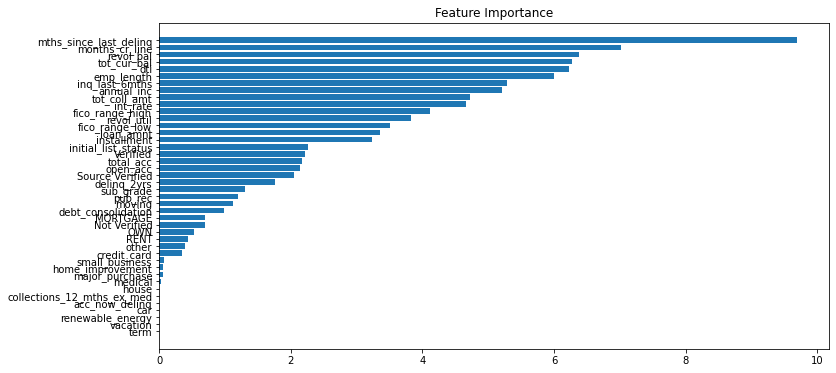

In [24]:
import matplotlib.pyplot as plt

feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

In [25]:
import shap

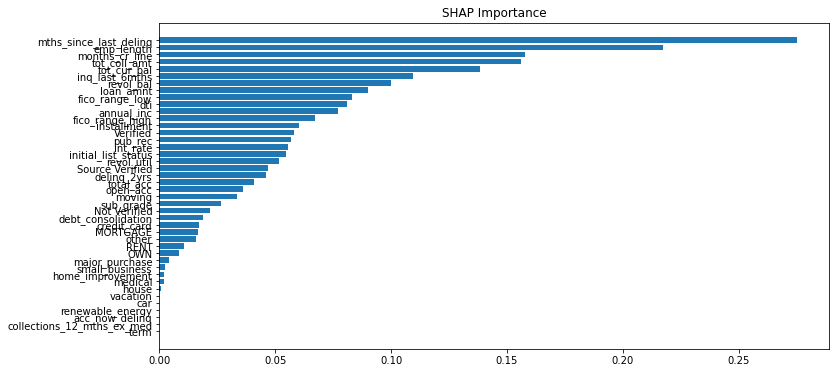

In [26]:
explainer = shap.Explainer(cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance');

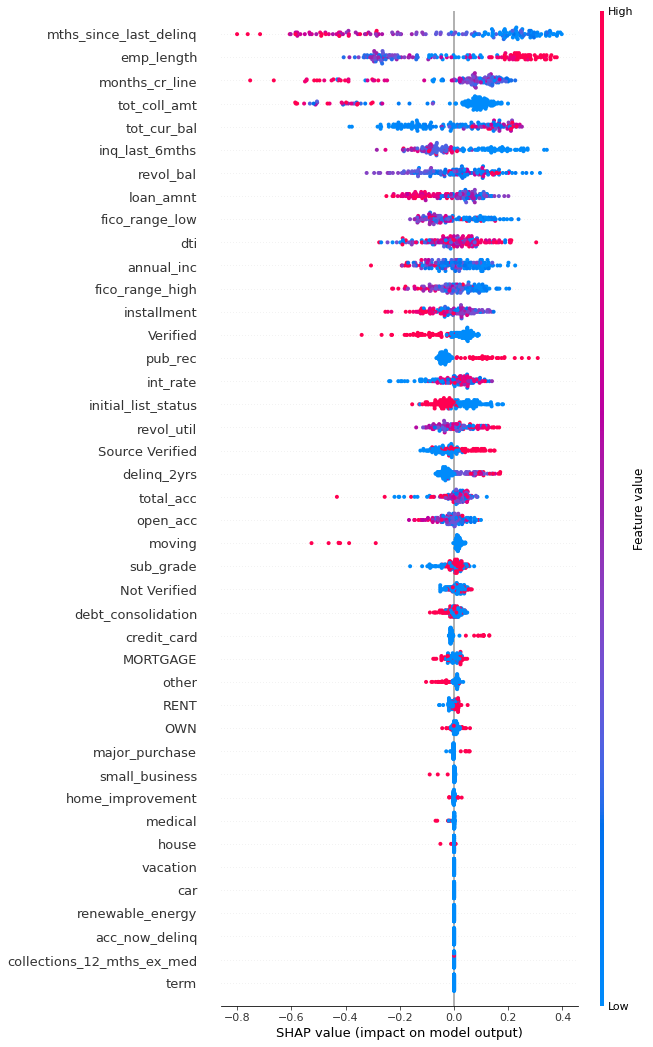

In [27]:
shap.summary_plot(shap_values, max_display=X_test.shape[0])